In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random


In [2]:
# Reads in data files for use in readData.py

hdu_north = fits.open('/Users/mtownsend/anaconda/Data/survey-dr8-north-specObj-dr14.fits') # this matches SDSS LRGs to MzLS/BASS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
hdu_south = fits.open('/Users/mtownsend/anaconda/Data/survey-dr8-south-specObj-dr14.fits')# this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
hdu_sdss = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
hdu_sweep1 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr8.fits') # this is one sweep file of the DECaLS data
hdu_sweep2 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr8.fits') # this is one sweep file of the DECaLS data

SpecObj_data_north = hdu_north[1].data
SpecObj_data_south = hdu_south[1].data
SDSS_data = hdu_sdss[1].data
DECaLS_data1 = hdu_sweep1[1].data
DECaLS_data2 = hdu_sweep2[1].data

id_LRG1, plate_LRG1, fiberid_LRG1, specobjid_LRG1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, z_LRG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, w1flux_LRG1, w2flux_LRG1, w3flux_LRG1, w4flux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1, w1flux_BKG1, w2flux_BKG1, w3flux_BKG1, w4flux_BKG1, gflux_ivar_LRG1, rflux_ivar_LRG1, zflux_ivar_LRG1, w1flux_ivar_LRG1, w2flux_ivar_LRG1, w3flux_ivar_LRG1, w4flux_ivar_LRG1, gflux_ivar_BKG1, rflux_ivar_BKG1, zflux_ivar_BKG1, w1flux_ivar_BKG1, w2flux_ivar_BKG1, w3flux_ivar_BKG1, w4flux_ivar_BKG1, mw_transmission_g_LRG1, mw_transmission_r_LRG1, mw_transmission_z_LRG1, mw_transmission_g_BKG1, mw_transmission_r_BKG1, mw_transmission_z_BKG1, mw_transmission_w1_LRG1, mw_transmission_w2_LRG1, mw_transmission_w3_LRG1, mw_transmission_w4_LRG1, mw_transmission_w1_BKG1, mw_transmission_w2_BKG1, mw_transmission_w3_BKG1, mw_transmission_w4_BKG1 = readData(SpecObj_data_south, SDSS_data, DECaLS_data1)
id_LRG2, plate_LRG2, fiberid_LRG2, specobjid_LRG2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, z_LRG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, w1flux_LRG2, w2flux_LRG2, w3flux_LRG2, w4flux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2, w1flux_BKG2, w2flux_BKG2, w3flux_BKG2, w4flux_BKG2, gflux_ivar_LRG2, rflux_ivar_LRG2, zflux_ivar_LRG2, w1flux_ivar_LRG2, w2flux_ivar_LRG2, w3flux_ivar_LRG2, w4flux_ivar_LRG2, gflux_ivar_BKG2, rflux_ivar_BKG2, zflux_ivar_BKG2, w1flux_ivar_BKG2, w2flux_ivar_BKG2, w3flux_ivar_BKG2, w4flux_ivar_BKG2, mw_transmission_g_LRG2, mw_transmission_r_LRG2, mw_transmission_z_LRG2, mw_transmission_g_BKG2, mw_transmission_r_BKG2, mw_transmission_z_BKG2, mw_transmission_w1_LRG2, mw_transmission_w2_LRG2, mw_transmission_w3_LRG2, mw_transmission_w4_LRG2, mw_transmission_w1_BKG2, mw_transmission_w2_BKG2, mw_transmission_w3_BKG2, mw_transmission_w4_BKG2 = readData(SpecObj_data_south, SDSS_data, DECaLS_data2)


print("end readdata")

# IMPORTANT NOTE: LRG data is the same for each.

done reading in SDSS
done reading in DECaLS-SDSS matched file
done creating unique IDs for matched file
done making LRG only cut
done reading in DECaLS bricks
length of id_ALL:  4488579
done creating unique IDs for brick file
done identifying LRGs in survey brick
631147
done making survey cuts
done reading in SDSS
done reading in DECaLS-SDSS matched file
done creating unique IDs for matched file
done making LRG only cut
done reading in DECaLS bricks
length of id_ALL:  4076998
done creating unique IDs for brick file
done identifying LRGs in survey brick
249137
done making survey cuts
end readdata


2037
1823
517525


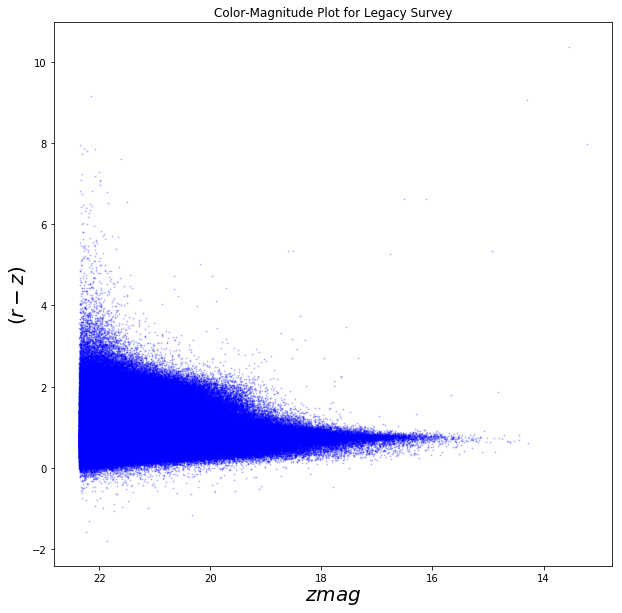

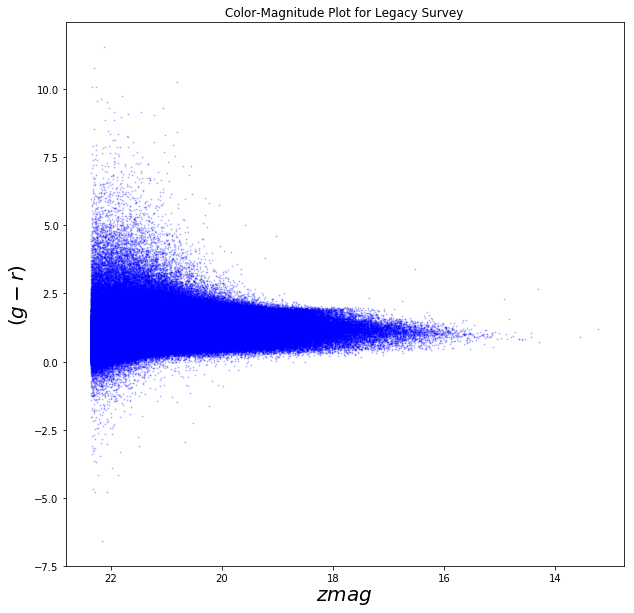

In [3]:
# calculate LRG magnitudes

gmag_LRG_nocuts = 22.5 - 2.5 * np.log10(gflux_LRG1/mw_transmission_g_LRG1)
rmag_LRG_nocuts = 22.5 - 2.5 * np.log10(rflux_LRG1/mw_transmission_r_LRG1)
zmag_LRG_nocuts = 22.5 - 2.5 * np.log10(zflux_LRG1/mw_transmission_z_LRG1)

print(len(zmag_LRG_nocuts))

# calculate BKG magnitudes

gmag_BKG1 = 22.5 - 2.5 * np.log10(gflux_BKG1)
gmag_BKG2 = 22.5 - 2.5 * np.log10(gflux_BKG2)
rmag_BKG1 = 22.5 - 2.5 * np.log10(rflux_BKG1)
rmag_BKG2 = 22.5 - 2.5 * np.log10(rflux_BKG2)
zmag_BKG1 = 22.5 - 2.5 * np.log10(zflux_BKG1)
zmag_BKG2 = 22.5 - 2.5 * np.log10(zflux_BKG2)

gmag_BKG_nocuts = np.concatenate([gmag_BKG1, gmag_BKG2])
rmag_BKG_nocuts = np.concatenate([rmag_BKG1, rmag_BKG2])
zmag_BKG_nocuts = np.concatenate([zmag_BKG1, zmag_BKG2])
  
    
# zmag_cut_test = np.concatenate([zmag_LRG_nocuts, zmag_BKG])
    
# calculate LRG (g-r) and (r-z) colors
    
grcolor_LRG_nocuts = gmag_LRG_nocuts - rmag_LRG_nocuts
rzcolor_LRG_nocuts = rmag_LRG_nocuts - zmag_LRG_nocuts
    
# calculate BKG (g-r) and (r-z) colors
    
grcolor_BKG_nocuts = gmag_BKG_nocuts - rmag_BKG_nocuts
rzcolor_BKG_nocuts = rmag_BKG_nocuts - zmag_BKG_nocuts

# create full list of LRG attributes

ra_LRG_nocuts = ra_LRG1
ra_BKG_nocuts = np.concatenate([ra_BKG1, ra_BKG2])
dec_LRG_nocuts = dec_LRG1
dec_BKG_nocuts = np.concatenate([dec_BKG1, dec_BKG2])
z_LRG_nocuts = z_LRG1
id_LRG_nocuts = id_LRG1

ra_nocuts = np.concatenate([ra_LRG_nocuts, ra_BKG_nocuts])
dec_nocuts = np.concatenate([dec_LRG_nocuts, dec_BKG_nocuts])

# cut for zmag brighter than 22.36

ra_LRG_temp = ra_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
dec_LRG_temp = dec_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
id_LRG_temp = id_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
z_LRG_temp = z_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
gmag_LRG_temp = gmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
rmag_LRG_temp = rmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
zmag_LRG_temp = zmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
grcolor_LRG_temp = grcolor_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
rzcolor_LRG_temp = rzcolor_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]

# calculate rest-frame magnitudes

# K_correct = -2.5*np.log10((1. + z_LRG_temp)**-1.)
# Mz = zmag_LRG_temp - DM_arr - K_correct
# Lz = 10.**((Mz-Msun_z)/(-2.5))
# log_Lz = np.log10(Lz)

ra_LRG = ra_LRG_temp #[np.where(log_Lz > 10.5)]
dec_LRG = dec_LRG_temp # [np.where(log_Lz > 10.5)]
id_LRG = id_LRG_temp # [np.where(log_Lz > 10.5)]
z_LRG = z_LRG_temp # [np.where(log_Lz > 10.5)]

# plate_LRG = plate_LRG1[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
# fiberid_LRG = fiberid_LRG1[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]

gmag_LRG = gmag_LRG_temp # [np.where(log_Lz > 10.5)]
rmag_LRG = rmag_LRG_temp # [np.where(log_Lz > 10.5)]
zmag_LRG = zmag_LRG_temp # [np.where(log_Lz > 10.5)]
grcolor_LRG = grcolor_LRG_temp # [np.where(log_Lz > 10.5)]
rzcolor_LRG = rzcolor_LRG_temp# [np.where(log_Lz > 10.5)]

ra_BKG = ra_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
dec_BKG = dec_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]

gmag_BKG = gmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
rmag_BKG = rmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
zmag_BKG = zmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
grcolor_BKG = grcolor_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
rzcolor_BKG = rzcolor_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]

# combine LRG and BKG lists

ra = np.concatenate([ra_LRG, ra_BKG])
dec = np.concatenate([dec_LRG, dec_BKG])

gmag = np.concatenate([gmag_LRG, gmag_BKG])
rmag = np.concatenate([rmag_LRG, rmag_BKG])
zmag = np.concatenate([zmag_LRG, zmag_BKG])

grcolor = np.concatenate([grcolor_LRG, grcolor_BKG]) 
rzcolor = np.concatenate([rzcolor_LRG, rzcolor_BKG]) 

print(len(ra_LRG))
print(len(ra_BKG))

plt.rcParams["figure.figsize"] = [10, 10]
plt.scatter(zmag, rzcolor, s=1, c='blue', alpha=0.2, label="Legacy Survey")
# plt.scatter(grcolor_UVLS, rzcolor_UVLS, s=5, alpha=0.2, c='green', marker="v", label="UltraVista")
plt.gca().invert_xaxis()
# plt.xlim(-1.,8.)
# plt.ylim(-1.,5.)
plt.title("Color-Magnitude Plot for Legacy Survey")
plt.xlabel(r'$zmag$', fontsize=20)
plt.ylabel(r'$(r-z)$', fontsize=20)
# plt.legend(loc='upper right', markerscale=3)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/25June2020/legacy-UV-color-color.pdf')

plt.show()

plt.rcParams["figure.figsize"] = [10, 10]
plt.scatter(zmag, grcolor, s=1, c='blue', alpha=0.2, label="Legacy Survey")
# plt.scatter(grcolor_UVLS, rzcolor_UVLS, s=5, alpha=0.2, c='green', marker="v", label="UltraVista")
plt.gca().invert_xaxis()
# plt.xlim(-1.,8.)
# plt.ylim(-1.,5.)
plt.title("Color-Magnitude Plot for Legacy Survey")
plt.xlabel(r'$zmag$', fontsize=20)
plt.ylabel(r'$(g-r)$', fontsize=20)
# plt.legend(loc='upper right', markerscale=3)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/25June2020/legacy-UV-color-color.pdf')

plt.show()


In [4]:
# rz_edges = [-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086]
# zmag_edges = [13.22509, 13.425090026855468, 13.625090026855467, 13.825090026855467, 14.025090026855466, 14.225090026855465, 14.425090026855464, 14.625090026855464, 14.825090026855463, 15.025090026855462, 15.225090026855462, 15.425090026855461, 15.62509002685546, 15.82509002685546, 16.02509002685546, 16.225090026855458, 16.425090026855457, 16.625090026855457, 16.825090026855456, 17.025090026855455, 17.225090026855455, 17.425090026855454, 17.625090026855453, 17.825090026855452, 18.02509002685545, 18.22509002685545, 18.42509002685545, 18.62509002685545, 18.82509002685545, 19.025090026855448, 19.225090026855447, 19.425090026855447, 19.625090026855446, 19.825090026855445, 20.025090026855445, 20.225090026855444, 20.425090026855443, 20.625090026855442, 20.82509002685544, 21.02509002685544, 21.22509002685544, 21.42509002685544, 21.62509002685544, 21.825090026855438, 22.025090026855437, 22.225090026855437, 22.425090026855436, 22.625090026855435, 22.825090026855435, 23.025090026855434]
# gr_edges = [-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765]

# rz_edges = np.array([-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086])
# zmag_edges = np.array([13.22509, 14.025090026855466, 15.025090026855462, 16.02509002685546, 17.025090026855455, 18.02509002685545, 19.025090026855448, 20.025090026855445, 21.02509002685544, 22.025090026855437, 23.025090026855434])
# gr_edges = np.array([-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765])

rz_edges = np.array([-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086])
# zmag_edges = np.array([13.22509, 14.025090026855466, 15.025090026855462, 16.02509002685546, 17.025090026855455, 18.02509002685545, 19.025090026855448, 20.025090026855445, 21.025, 22.025090026855437, 23.025090026855434])
gr_edges = np.array([-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765])

zmaginit = 13.
zmagfin = 23.
interval = 0.2
zmag_num = (zmagfin-zmaginit)/interval
zmag_edges, step = np.linspace(zmaginit, zmagfin, num=int(zmag_num), retstep=True)
print(zmag_edges)
print(zmag_edges[41])
print(zmag_edges[42])
print(rz_edges[13])
print(rz_edges[14])
print(gr_edges[20])
print(gr_edges[21])

H1, nouse_edges = np.histogramdd((rzcolor, grcolor, zmag), bins=(rz_edges, gr_edges, zmag_edges), density=False)

[13.         13.20408163 13.40816327 13.6122449  13.81632653 14.02040816
 14.2244898  14.42857143 14.63265306 14.83673469 15.04081633 15.24489796
 15.44897959 15.65306122 15.85714286 16.06122449 16.26530612 16.46938776
 16.67346939 16.87755102 17.08163265 17.28571429 17.48979592 17.69387755
 17.89795918 18.10204082 18.30612245 18.51020408 18.71428571 18.91836735
 19.12244898 19.32653061 19.53061224 19.73469388 19.93877551 20.14285714
 20.34693878 20.55102041 20.75510204 20.95918367 21.16326531 21.36734694
 21.57142857 21.7755102  21.97959184 22.18367347 22.3877551  22.59183673
 22.79591837 23.        ]
21.367346938775512
21.57142857142857
1.4472923278808594
1.6972923278808594
0.41532135009765436
0.7653213500976543


397


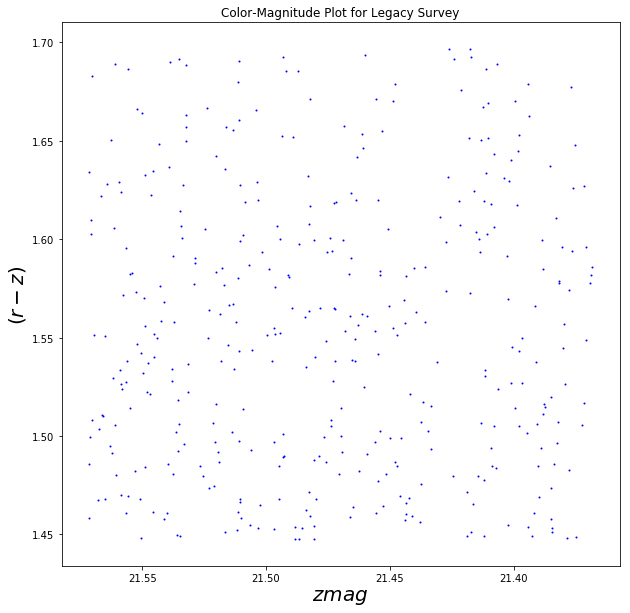

In [5]:
# selecting one cell in color-magnitude space and all the galaxies in it

ra_cell = []
dec_cell = []
zmag_cell = []
gmag_cell = []
rmag_cell = []
rzcolor_cell = []
grcolor_cell = []
for m in range(len(ra)):
    if ((zmag[m] >= zmag_edges[41]) & (zmag[m] <= zmag_edges[42]) & (rzcolor[m] >= rz_edges[13]) & (rzcolor[m] <= rz_edges[14]) & (grcolor[m] >= gr_edges[20]) & (grcolor[m] <= gr_edges[21])):
        ra_cell.append(ra[m])
        dec_cell.append(dec[m])
        zmag_cell.append(zmag[m])
        gmag_cell.append(gmag[m])
        rmag_cell.append(rmag[m])
        rzcolor_cell.append(rzcolor[m])
        grcolor_cell.append(grcolor[m])
                
print(len(ra_cell))

plt.rcParams["figure.figsize"] = [10, 10]
plt.scatter(zmag_cell, rzcolor_cell, s=1, c='blue', label="Legacy Survey")
# plt.scatter(grcolor_UVLS, rzcolor_UVLS, s=5, alpha=0.2, c='green', marker="v", label="UltraVista")
plt.gca().invert_xaxis()
# plt.xlim(-1.,8.)
# plt.ylim(-1.,5.)
plt.title("Color-Magnitude Plot for Legacy Survey")
plt.xlabel(r'$zmag$', fontsize=20)
plt.ylabel(r'$(r-z)$', fontsize=20)
# plt.legend(loc='upper right', markerscale=3)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/25June2020/legacy-UV-color-color.pdf')

plt.show()



In [29]:
from scipy.stats import poisson

n_edr = len(ra_cell) # / len(ra) # total number in the cell over the entire EDR
print(len(ra_cell))
print(len(ra))

area_edr = 25. # unit: square degrees
# sigma_edr = n_edr / area_edr # unit: number per square degree

print(n_edr)
# print(sigma_edr)

397
519348
397


In [33]:
# find values for background

outer = 0.5 # units: degree
inner = 0.4 # units: degree
area_bkg = np.pi * (outer**2. - inner**2.) # area of the background annulus; units: square degree
print(area_bkg)

radius = 500. # units: kpc
scale = 4.494 # units kpc/arcsec
# scale = 7.011
area_500 = np.pi * radius**2. # units square kpc

n_bkg = sigma_edr * area_bkg # "true" number within the background annulus
nobs_bkg = np.random.poisson(n_bkg, 1000) # 100000000 iterations of the "observed" realization of the "true" number

print(n_bkg)
print(len(nobs_bkg[np.where(nobs_bkg != 0)]))

0.2827433388230813
4.022991362949273e-06
0


In [17]:
# find values for near neighbors

radius = 500. # units: kpc
scale = 4.494 # units kpc/arcsec
# scale = 7.011
area_500 = np.pi * radius**2. # units square kpc
area_500_deg = area_500 * (1./scale)**2. * (1./3600.)**2. # kpc2 * (arcsec/kpc)2 * (deg/arcsec)2 = square deg

# n_nn = sigma_edr * (area_500 * (1./3600)**2. * (1./scale)**2.) # units: number
n_nn = sigma_edr * area_500_deg # units: number
nobs_nn = np.random.poisson(n_nn, 1000)

print(n_nn)
print(len(nobs_nn[np.where(nobs_nn != 0)]))

0.047650695265270326
60


In [18]:
nsat_true = n_nn - n_bkg
nsat_obs = nobs_nn - nobs_bkg

print(nsat_true)
print(len(nsat_obs[np.where(nsat_obs != 0)]))

-4.442313525245261
992


-4.0
-4.58
2.245796072665548


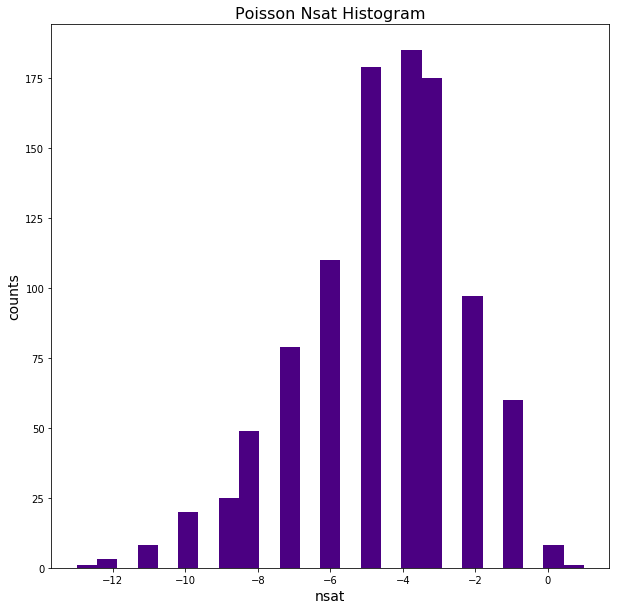

In [20]:
print(np.median(nsat_obs))
print(np.mean(nsat_obs))
print(np.std(nsat_obs))

plt.hist(nsat_obs, bins=25, color='indigo')
# fig = plt.figure()
# ax = fig.add_subplot(111)
plt.title('Poisson Nsat Histogram', fontsize=16)
plt.xlabel('nsat', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/11Sept2020/poisson_nsat_distribution.pdf')
plt.show()


In [ ]:
# scale random number from previous cell to area of background annulus
# simulates number of background galaxies

outer = 0.5
inner = 0.4

area_BKG = np.pi * (outer**2. - inner**2.)

print(area_BKG)

num_BKG = data * area_BKG # gives number of gals with no units
# num_BKG = data / area_BKG # gives number of gals per square degree

print(num_BKG)

In [ ]:
# use kpc_DA from Ned Wright's cosmological calculator to find the scale for a low-z 500 kpc aperature
# used his website becaues I just need one and the code I modified needs a list of redshifts

# scales number of expected galaxies in background annulus to an area within 500 kpc of LRG

kpc_DA = 4.494 # in units of kpc/arcsec
distance_kpc = 500.
radius = (distance_kpc / kpc_DA) * (1./3600.) # gives radial distance in deg

area_500 = np.pi*radius**2.
print(area_500)

expBKG_500 = num_BKG / area_500 # gal per square degree
# expBKG_500 = num_BKG / area_500 # gal per square degree

print(expBKG_500)

In [ ]:
data2 = poisson.rvs(trugal, size=1)
print(data2)

expNN_500 = data2 * area_500 # units: gal
# expNN_500 = data2 / area_500 # units: gal per square degree
print(expNN_500)